DATA SET DRIVE LINK- https://drive.google.com/drive/folders/1hOXaHIDlUmT6-0Hm8MFCZ9vFNHQFCpWQ?usp=sharing

* IMPORT ALL MODULES REQUIRED FOR PROJECT.





In [26]:
!pip install alive-progress

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 207 kB 68.7 MB/s 
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210096 sha256=afd295a3b4b539c9de4d16ab354910463d5378d0ec64916e0d95d155f2abd910
  Stored in directory: /root/.cache/pip/wheels/71/fc/c8/142ef03b79c02b618fe80b9f2d01c25bd55f60b0c58eab3f0e
Successfully built grapheme


In [27]:
import glob
import matplotlib.pyplot as plt
from skimage import io
from skimage import filters
import csv
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import os
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from alive_progress import alive_bar

*   READ IMAGES FROM GOOGLE DRIVE STORAGE AND PROCESS USING SKIMAGE AND OPENCV






In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lst = os.listdir(path_infected) # your directory path
number_files = len(lst)
number_files

In [ ]:
#Set google drive paths to read images in loop and create list of the paths to iterate in for loop.
path_infected=r'/content/drive/MyDrive/Colab Notebooks/cell-images-for-detecting-malaria/cell_images/Parasitized'
path_uninfected=r'/content/drive/MyDrive/Colab Notebooks/cell-images-for-detecting-malaria/cell_images/Uninfected'
directory=[path_infected,path_uninfected] 

#creating .csv file based on results obtained by image processing.
rows=[] 
for path in directory:
  
  len_images = len(os.listdir(path))
  with alive_bar(len_images) as bar:
    for image in os.scandir(path): 
      # if count>50: #stop iterating images at value when dataset size reaches size n
      #   break
      if (image.path.endswith(".png")): #perform image processing operations only if file is a .PNG image.
        im = io.imread(image.path) 
        im = filters.gaussian(im,sigma=0.9) 
        im_gray = rgb2gray(im) 
        im_gray=img_as_ubyte(im_gray) #change image encoding to allow further processing using openCV

        #process image using opencv to find contours.
        ret,thresh = cv2.threshold(im_gray,127,255,0) 
        contours,_ = cv2.findContours(thresh,1,2) 
        cv2.drawContours(im,contours, -1, (0, 255, 0), 3) 
        # cv2_imshow(im)
        data=[]
        
        for i in range (5): #run for loop to get area of contours and setting status.
          if i<len(contours):
            data.append(str(cv2.contourArea(contours[i])))
          else:
            data.append("0")
        if path==path_infected:
          data.append("infected")
        else:
          data.append("uninfected")
        rows.append(data)
        bar()

#write the csv file from processed data.
fields = ['Area-1', 'Area-2', 'Area-3','Area-4','Area-5',"Status"] 
with open('dataset-single.csv', 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields) 
    csvwriter.writerows(rows) 

*  READ CSV,SAVE TO PANDAS DATA FRAME AND CREATE MULTIPLE ML MODELS




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


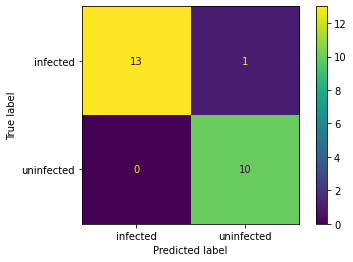

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy score on test dataset ( KNeighborsClassifier ):  0.9583333333333334


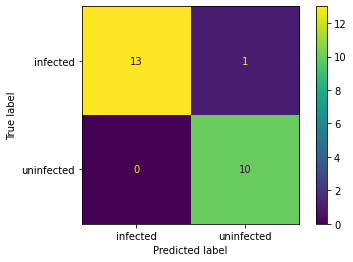

Accuracy score on test dataset ( DecisionTreeClassifier ):  0.9583333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


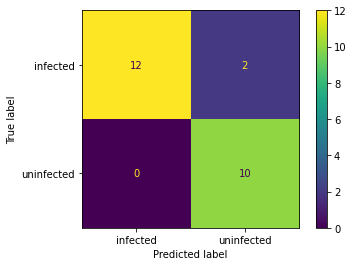

Accuracy score on test dataset ( RandomForestClassifier ):  0.9166666666666666


In [23]:
# read the train and test dataset
data = pd.read_csv('dataset-single.csv')

# Now, we need to predict the missing target variable in the test data
# target variable - infected/uninfected
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.24, random_state = 42)
model = [KNeighborsClassifier(), DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=5, max_features=1)]
model_names= ["KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier"]
accuracy_test=[]
for i in range(len(model)):  
  # fit the model with the training data
  model[i].fit(train_X,train_y)
  
  # predict the target on the test dataset
  predict_test = model[i].predict(test_X)

  # plot confusion matrix for each of the models
  plot_confusion_matrix(model[i],test_X,test_y)  
  plt.show()

  # Accuracy Score on test dataset
  accuracy_test.append(accuracy_score(test_y,predict_test))
  print('Accuracy score on test dataset (',model_names[i],"): ",accuracy_test[i])

*   UPLOAD IMAGE TO CLASSIFY WHETHER IMAGE IS INFECTED OR NOT


In [ ]:

uploaded = files.upload()
filename=list(uploaded.keys())
print("\n")
if filename[0].endswith(".png"):
  im = io.imread(filename[0])
  im = filters.gaussian(im,sigma=0.8,multichannel=False)
  im_gray = rgb2gray(im)
  im_gray=img_as_ubyte(im_gray)

  ret,thresh = cv2.threshold(im_gray,127,255,0)
  contours,_ = cv2.findContours(thresh,1,2)
  cv2.drawContours(im,contours, -1, (0, 255, 0), 3)
  data=[]
  for i in range (5):
    if i<len(contours):
      data.append(float(cv2.contourArea(contours[i])))
    else:
      data.append(0.0)
  sample_test=[data]

  for i in range(len(model)):
    predict_sample = model[i].predict(sample_test)
    print("Result: ",predict_sample[0],"\nAccuracy of Model: (",model_names[i],"): ",accuracy_test[i],"\n")
else:
  print("Upload .PNG image file!")

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

COMPLETE CODE

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import filters
import csv
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import os
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

path_infected=r'/content/drive/MyDrive/Colab Notebooks/cell-images-for-detecting-malaria/cell_images/Parasitized'
path_uninfected=r'/content/drive/MyDrive/Colab Notebooks/cell-images-for-detecting-malaria/cell_images/Uninfected'
directory=[path_infected,path_uninfected]
rows=[]
for path in directory:
  count=0
  for image in os.scandir(path):
    count=count+1
    if count>1000:
      break
    if (image.path.endswith(".png")):
      im = io.imread(image.path)
      im = filters.gaussian(im,sigma=0.9,multichannel="False")
      im_gray = rgb2gray(im)
      im_gray=img_as_ubyte(im_gray)

      ret,thresh = cv2.threshold(im_gray,127,255,0)
      contours,_ = cv2.findContours(thresh,1,2)
      cv2.drawContours(im,contours, -1, (0, 255, 0), 3)
      data=[]
      
      for i in range (5):
        if i<len(contours):
          data.append(str(cv2.contourArea(contours[i])))
        else:
          data.append("0")
      if path==path_infected:
        data.append("infected")
      else:
        data.append("uninfected")
      rows.append(data)

fields = ['Area-1', 'Area-2', 'Area-3','Area-4','Area-5',"Status"] 
with open('dataset-tp.csv', 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)

ret,thresh = cv2.threshold(im_gray,127,255,0)
contours,_ = cv2.findContours(thresh,1,2)
cv2.drawContours(im,contours, -1, (0, 255, 0), 3)
data = []
for i in range (5):
  if i<len(contours):
    data.append(str(cv2.contourArea(contours[i])))
  else:
    data.append("0")
rows.append(data)

dataset = pd.read_csv('dataset-1000.csv')

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = [KNeighborsClassifier(5), DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]
model_names= ["KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier"]

accuracy_test = []
for i in range(len(model)):  
  model[i].fit(train_X,train_y)
  predict_test = model[i].predict(test_X)
  accuracy_test.append(accuracy_score(test_y,predict_test))

uploaded = files.upload()
filename = list(uploaded.keys())
print("\n")
if filename[0].endswith(".png"):
  im = io.imread(filename[0])
  im = filters.gaussian(im,sigma=0.8,multichannel=False)
  im_gray = rgb2gray(im)
  im_gray=img_as_ubyte(im_gray)

  ret,thresh = cv2.threshold(im_gray,127,255,0)
  contours,_ = cv2.findContours(thresh,1,2)
  cv2.drawContours(im,contours, -1, (0, 255, 0), 3)
  data = []
  for i in range (5):
    if i<len(contours):
      data.append(float(cv2.contourArea(contours[i])))
    else:
      data.append(0.0)
  sample_test = [data]

  for i in range(len(model)):
    predict_sample = model[i].predict(sample_test)
    print("Result: ", predict_sample[0], "\nAccuracy of Model: (", model_names[i], "): ", round(accuracy_test[i],3), "\n")
else:
  print("Upload .PNG image file!")

In [ ]:
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters

# Define a few command handlers. These usually take the two arguments update and
# context. Error handlers also receive the raised TelegramError object in error.
def start(update, context):
    update.message.reply_text('Hey! This is a bot to tell if your cell sample is detected with malaria or not. Upload an image of a Cell to Check!')

def check(update, context):
    update.message.reply_text('Bot is Working Fine! Tell this to Naman \U0001F923')

def malariapred(update, context):
  # try:
  obj=context.bot.getFile(file_id=update.message.document.file_id)
  print(obj)
  print(update)
  print(context)
  img=obj.download()
  print(str(img))
  im = io.imread(str(img))
  io.imshow(im)
  update.message.reply_text("File has been downloaded.")
  im = io.imread(str(img))
  io.imshow(im)
  im = filters.gaussian(im,sigma=0.8,multichannel=False)
  im_gray = rgb2gray(im)
  im_gray=img_as_ubyte(im_gray)

  ret,thresh = cv2.threshold(im_gray,127,255,0)
  contours,_ = cv2.findContours(thresh,1,2)
  cv2.drawContours(im,contours, -1, (0, 255, 0), 3)
  data = []
  for i in range (5):
    if i<len(contours):
      data.append(float(cv2.contourArea(contours[i])))
    else:
      data.append(0.0)
  sample_test = [data]

  for i in range(len(model)):
    predict_sample = model[i].predict(sample_test)
    update.message.reply_text("Result: " + str(predict_sample[0]) +"\nAccuracy of Model: ("+ model_names[i] + "): " + str(round(accuracy_test[i],3)) + "\n")
  # except Exception as e:
  #   print(str(e))



def main():
    """Start the bot."""
    # Create the Updater and pass it your bot's token.
    # Make sure to set use_context=True to use the new context based callbacks
    # Post version 12 this will no longer be necessary
    TOKEN="1727119674:AAEEMbRziRyZc3e2RSC4YG5B7LZ0m8bL1hw"
    updater = Updater(TOKEN, use_context=True)

    # Get the dispatcher to register handlers
    dp = updater.dispatcher

    # on different commands - answer in Telegram
    dp.add_handler(CommandHandler("start", start))
    dp.add_handler(CommandHandler("check", check))
    dp.add_handler(MessageHandler(Filters.document.image, malariapred))

    # on noncommand i.e message - echo the message on Telegram
    dp.add_handler(MessageHandler(Filters.text, start))

    # log all errors

    # Start the Bot
    updater.start_polling()
    updater.idle()


if __name__ == '__main__':
    main()